# §1 時系列分析の基礎概念

In [1]:
%matplotlib inline

from __future__ import unicode_literals, print_function
import six
import sys
import os
import math
import datetime as dt
import numpy as np
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.rcParams['font.family'] = 'IPAexGothic'

In [2]:
sys.version_info

sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)

## 章末問題

### 1.3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f067080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112509160>]], dtype=object)

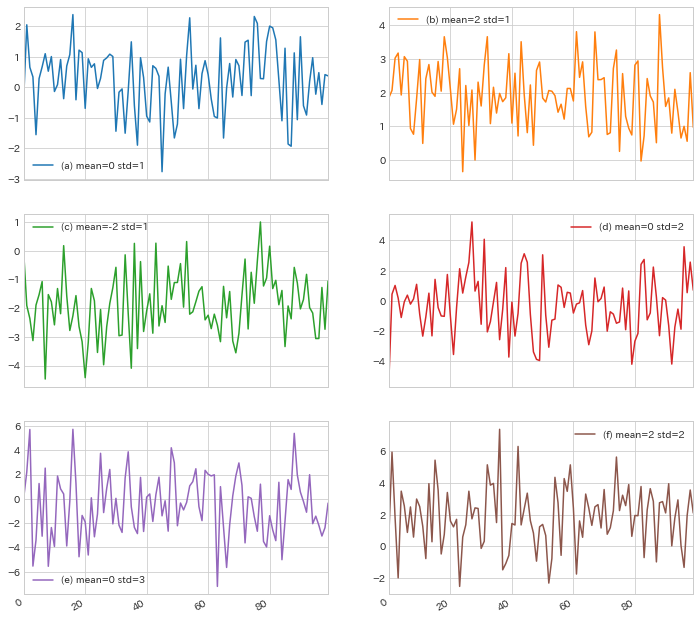

In [3]:
params = [
    {'name': 'a', 'mean': 0, 'std': 1},
    {'name': 'b', 'mean': 2, 'std': 1},
    {'name': 'c', 'mean': -2, 'std':1},
    {'name': 'd', 'mean': 0, 'std': 2},
    {'name': 'e', 'mean': 0, 'std': 3},
    {'name': 'f', 'mean': 2, 'std': 2},
]

white_noises = pd.DataFrame()

for item in params:
    col_name = '({}) mean={} std={}'.format(item['name'], item['mean'], item['std'])
    white_noises[col_name] = np.random.normal(item['mean'], item['std'], 100)

white_noises.plot(subplots=True, layout=(3,2), figsize=(12,12))

### 1.5

http://www.geocities.jp/tatsuyoshi_okimoto/books/tsa/economicdata.xls をダウンロード

In [4]:
eco = pd.read_excel(os.path.join('cache', 'economicdata.xls'), index_col='date')
eco.head()

,topix,exrate,indprod,cpi,saunemp,intrate
date,,,,,,
1975-01-01,276.09,29.13,47.33,52.625,1.7,12.67
1975-02-01,299.81,29.70,46.86,52.723,1.8,13.00
1975-03-01,313.50,29.98,46.24,53.114,1.8,12.92
1975-04-01,320.57,29.80,47.33,54.092,1.8,12.02
1975-05-01,329.65,29.79,47.33,54.385,1.8,11.06


#### (1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112cf66d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112e45630>]], dtype=object)

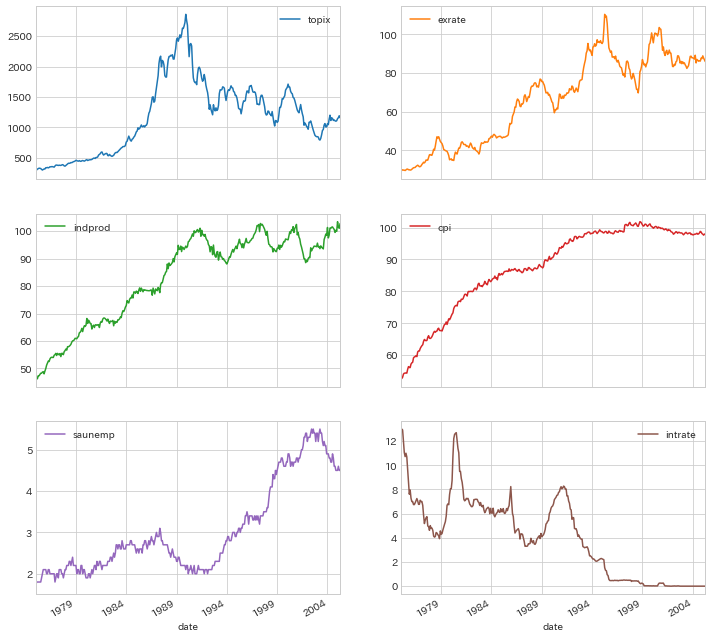

In [5]:
eco.plot(subplots=True, layout=(3,2), figsize=(12,12))

#### (3)

In [6]:
eco_ld = np.log(eco).diff()
eco_ld.head()

/Users/uents/.anyenv/envs/pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,topix,exrate,indprod,cpi,saunemp,intrate
date,,,,,,
1975-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1975-02-01,0.082422,0.019378,-0.009980,0.001861,0.057158,0.025712
1975-03-01,0.044650,0.009383,-0.013319,0.007389,0.000000,-0.006173
1975-04-01,0.022301,-0.006022,0.023299,0.018246,0.000000,-0.072205
1975-05-01,0.027931,-0.000336,0.000000,0.005402,0.000000,-0.083237


変化率は対数差分系列に100をかける

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11325dac8>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x1134e2e80>]], dtype=object)

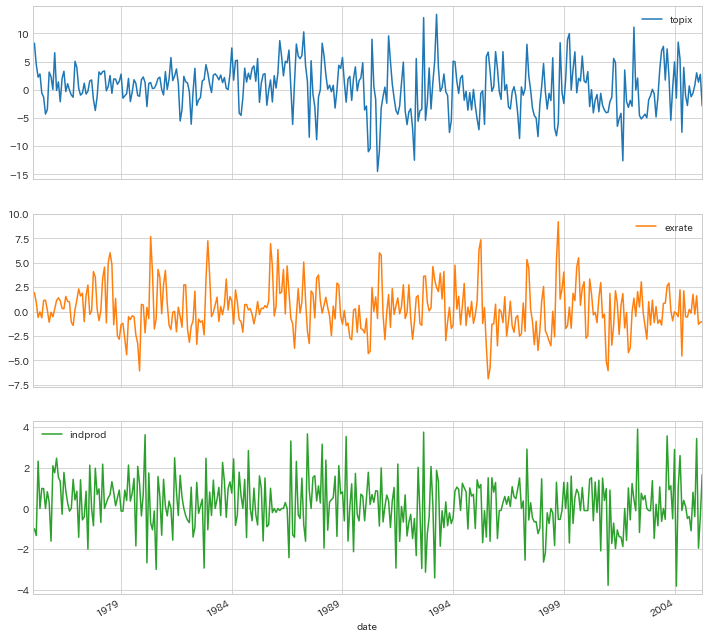

In [7]:
eco_cr = eco_ld * 100
eco_cr[['topix', 'exrate', 'indprod']].plot(subplots=True, layout=(3,1), figsize=(12,12))

#### (4), (5)

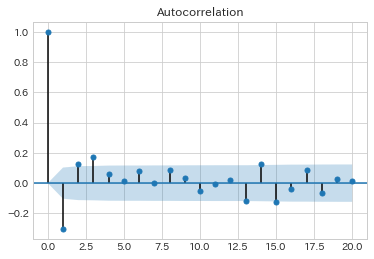

In [33]:
_ = sm.graphics.tsa.plot_acf(eco_cr['indprod'].dropna(), lags=20)

In [31]:
def portmanteau_test(series, lags=20):
    q_values, p_values = sm.stats.diagnostic.acorr_ljungbox(series.dropna(), lags=lags)
    return pd.DataFrame([q_values.round(2), p_values.round(3)], index=['Q(m)', 'P値'], columns=range(1, lags+1))

In [32]:
portmanteau_test(eco_cr['indprod'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q(m),34.2,39.76,50.4,51.8,51.91,54.46,54.46,57.46,57.94,58.84,58.87,58.98,64.37,70.27,76.34,76.84,79.79,81.35,81.62,81.73
P値,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


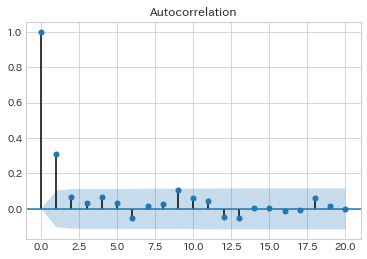

In [34]:
_ = sm.graphics.tsa.plot_acf(eco_cr['topix'].dropna(), lags=20)

In [35]:
portmanteau_test(eco_cr['topix'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q(m),34.68,36.39,36.84,38.55,38.91,39.87,39.97,40.2,44.42,45.97,46.76,47.59,48.66,48.68,48.68,48.72,48.73,50.06,50.18,50.18
P値,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


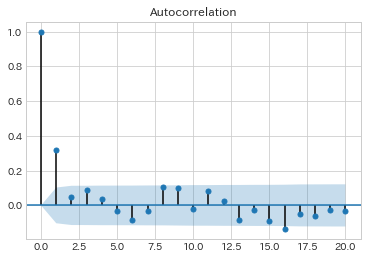

In [36]:
_ = sm.graphics.tsa.plot_acf(eco_cr['exrate'].dropna(), lags=20)

In [37]:
portmanteau_test(eco_cr['exrate'])

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Q(m),37.9,38.76,41.79,42.29,42.73,45.26,45.61,49.88,53.74,53.87,56.62,56.81,59.49,59.79,62.92,70.23,71.18,72.69,73.01,73.45
P値,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
